In [2]:
%matplotlib inline

In [60]:
path = "data/"
#path = "data/sample/"

In [4]:
from __future__ import division,print_function

import os, json
from glob import glob
import numpy as np
np.set_printoptions(precision=4, linewidth=100)
from matplotlib import pyplot as plt

In [5]:
import utils; reload(utils)
from utils import plots

Using gpu device 0: Tesla K80 (CNMeM is disabled, cuDNN 5103)
/home/ubuntu/anaconda2/lib/python2.7/site-packages/theano/sandbox/cuda/__init__.py:600: UserWarning: Your cuDNN version is more recent than the one Theano officially supports. If you see any problems, try updating Theano or downgrading cuDNN to version 5.
  warnings.warn(warn)
Using Theano backend.


In [61]:
batch_size = 64

In [62]:
import vgg16; reload(vgg16)
from vgg16 import Vgg16

In [63]:
vgg = Vgg16()

In [64]:
batches = vgg.get_batches(path+'/train', batch_size=4)

Found 23000 images belonging to 2 classes.


In [65]:
imgs,labels = next(batches)

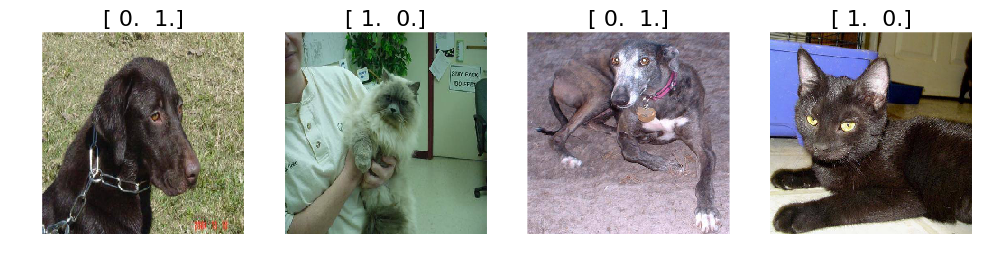

In [66]:
plots(imgs, titles=labels)

In [67]:
vgg.predict(imgs, True)

(array([ 0.8412,  0.5294,  0.5839,  0.6014], dtype=float32),
 array([205, 283, 172, 285]),
 [u'flat-coated_retriever', u'Persian_cat', u'whippet', u'Egyptian_cat'])

In [68]:
vgg.classes[:4]

[u'tench', u'goldfish', u'great_white_shark', u'tiger_shark']

In [69]:
batch_size

64

In [70]:
batches = vgg.get_batches(path+'/train', batch_size=batch_size)
val_batches = vgg.get_batches(path+'/validation', batch_size=batch_size)

Found 23000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [71]:
vgg.finetune(batches)

In [72]:
vgg.fit(batches, val_batches, nb_epoch=1)

Epoch 1/1
23000/23000 [==============================] - 611s - loss: 0.1213 - acc: 0.9681 - val_loss: 0.0592 - val_acc: 0.9840


In [73]:
vgg.fit(batches, val_batches, nb_epoch=4)

Epoch 1/4
23000/23000 [==============================] - 610s - loss: 0.0950 - acc: 0.9774 - val_loss: 0.0778 - val_acc: 0.9755
Epoch 2/4
23000/23000 [==============================] - 609s - loss: 0.0918 - acc: 0.9793 - val_loss: 0.0758 - val_acc: 0.9835
Epoch 3/4
23000/23000 [==============================] - 609s - loss: 0.0971 - acc: 0.9799 - val_loss: 0.0889 - val_acc: 0.9795
Epoch 4/4
23000/23000 [==============================] - 609s - loss: 0.0997 - acc: 0.9792 - val_loss: 0.0777 - val_acc: 0.9810


In [74]:
vgg.fit(batches, val_batches, nb_epoch=4)

Epoch 1/4
23000/23000 [==============================] - 609s - loss: 0.1047 - acc: 0.9783 - val_loss: 0.0855 - val_acc: 0.9840
Epoch 2/4
23000/23000 [==============================] - 609s - loss: 0.1073 - acc: 0.9805 - val_loss: 0.1129 - val_acc: 0.9825
Epoch 3/4
23000/23000 [==============================] - 609s - loss: 0.1053 - acc: 0.9807 - val_loss: 0.1128 - val_acc: 0.9850
Epoch 4/4
23000/23000 [==============================] - 609s - loss: 0.1015 - acc: 0.9811 - val_loss: 0.1149 - val_acc: 0.9805


In [75]:
vgg.fit(batches, val_batches, nb_epoch=10)

Epoch 1/10
23000/23000 [==============================] - 608s - loss: 0.1000 - acc: 0.9818 - val_loss: 0.1178 - val_acc: 0.9815
Epoch 2/10
23000/23000 [==============================] - 605s - loss: 0.0922 - acc: 0.9828 - val_loss: 0.0936 - val_acc: 0.9840
Epoch 3/10
23000/23000 [==============================] - 606s - loss: 0.1186 - acc: 0.9807 - val_loss: 0.0771 - val_acc: 0.9830
Epoch 4/10
23000/23000 [==============================] - 604s - loss: 0.1149 - acc: 0.9814 - val_loss: 0.1341 - val_acc: 0.9865
Epoch 5/10
23000/23000 [==============================] - 609s - loss: 0.1233 - acc: 0.9809 - val_loss: 0.1006 - val_acc: 0.9835
Epoch 6/10
23000/23000 [==============================] - 607s - loss: 0.1148 - acc: 0.9817 - val_loss: 0.1232 - val_acc: 0.9830
Epoch 7/10
23000/23000 [==============================] - 609s - loss: 0.1100 - acc: 0.9827 - val_loss: 0.1375 - val_acc: 0.9815
Epoch 8/10
23000/23000 [==============================] - 607s - loss: 0.1088 - acc: 0.9826 - val

# Results from running multiple Epochs

Looks like val_acc went down at first, then stabilized, spiked a little, and went down again when running 10 epochs at once.

## Question

Ist there a difference between running 2 `vgg.fit()` over 1 epoch each, and running one `vgg.fit` over 2 epochs?

In [76]:
vggResults = vgg.test(path+'/test', batch_size=batch_size)

Found 0 images belonging to 0 classes.


Exception in thread Thread-35:
Traceback (most recent call last):
  File "/home/ubuntu/anaconda2/lib/python2.7/threading.py", line 801, in __bootstrap_inner
    self.run()
  File "/home/ubuntu/anaconda2/lib/python2.7/threading.py", line 754, in run
    self.__target(*self.__args, **self.__kwargs)
  File "/home/ubuntu/anaconda2/lib/python2.7/site-packages/keras/engine/training.py", line 425, in data_generator_task
    generator_output = next(generator)
  File "/home/ubuntu/anaconda2/lib/python2.7/site-packages/keras/preprocessing/image.py", line 593, in next
    index_array, current_index, current_batch_size = next(self.index_generator)
  File "/home/ubuntu/anaconda2/lib/python2.7/site-packages/keras/preprocessing/image.py", line 441, in _flow_index
    current_index = (self.batch_index * batch_size) % N
ZeroDivisionError: integer division or modulo by zero



In [58]:
probabilityTuplesOfBoth = vggResults[1]
resultLines=['id,label']
imageIdCounter = 1
for probabilityTuple in probabilityTuplesOfBoth:
    pOfDog = probabilityTuple[1]
    resultLines.append(str(imageIdCounter)+','+str(pOfDog))
    imageIdCounter+=1

['id,label', '1,0.0451534', '2,0.0056626', '3,0.00129817', '4,0.0545173', '5,0.0065883', '6,0.00169753', '7,0.00698405', '8,0.000507755', '9,0.248655', '10,0.0444376', '11,0.000648873', '12,0.00343939', '13,0.0104003', '14,0.00551212', '15,0.00169307', '16,0.157221', '17,0.508565', '18,0.0107254', '19,0.581048', '20,0.762055', '21,0.908387', '22,0.148038', '23,0.141351', '24,0.081363', '25,0.000708119', '26,0.00320854', '27,0.0325516', '28,0.000475175', '29,0.00316804', '30,0.160622', '31,0.0107125', '32,0.00695617', '33,0.00708742', '34,0.000170279', '35,0.00306596', '36,0.000946017', '37,0.0569435', '38,0.0801122', '39,0.00108599', '40,0.262202', '41,0.17343', '42,0.000469861', '43,0.00227401', '44,0.0011406', '45,0.0100696', '46,0.140206', '47,0.0301928', '48,0.163956', '49,0.000636449', '50,0.0649667', '51,0.38781', '52,0.0230153', '53,0.640199', '54,0.367284', '55,0.0022454', '56,0.247697', '57,0.000450855', '58,0.00556327', '59,0.291202', '60,0.758709', '61,4.52173e-07', '62,0.50

In [59]:
with open('result.csv', 'w') as outputFile:
    for resultLine in resultLines:
        outputFile.write(resultLine+'\n')